For this project, I'll analyze and tidy up the data sourced from the dataset available on Kaggle.com ('https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset'). Initially, I'll scrutinize the data to identify any irregularities or absent entries. Subsequently, I'll enhance data readability by removing any inconsistencies. I love biking and this dataset looked very interesting to me. 

In [21]:
#If you need to install libraries 
#!pip install pandas
#!pip install zipfile
#!pip install kaggle
#!pip install matplotlib
# or
# python -m pip install -U pandas
# python -m pip install -U zipfile
# python -m pip install -U kaggle
# python -m pip install -U matplotlib

#import libraries
import pandas as pd
import kaggle
import zipfile



#download dataset using the Kaggle API 

In [2]:
!kaggle datasets download -d hmavrodiev/london-bike-sharing-dataset


  0%|          | 0.00/165k [00:00<?, ?B/s]
100%|██████████| 165k/165k [00:00<00:00, 1.53MB/s]
100%|██████████| 165k/165k [00:00<00:00, 1.53MB/s]


In [3]:
# extract the file from the downloaded zip file
zipfile_name = 'london-bike-sharing-dataset.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [4]:
# read in the csv file as a pandas dataframe
bikes = pd.read_csv("london_merged.csv")

In [5]:
# explore the data
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [6]:
bikes.shape

(17414, 10)

In [7]:
bikes

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [8]:
# Check for missing values
missing_values = bikes.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64


In [9]:
# specifying the column names that I want to use
new_cols_dict ={
    'timestamp':'time',
    'cnt':'count', 
    't1':'temp_real_C',
    't2':'temp_feels_like_C',
    'hum':'humidity_percent',
    'wind_speed':'wind_speed_kph',
    'weather_code':'weather',
    'is_holiday':'is_holiday',
    'is_weekend':'is_weekend',
    'season':'season'
}

# Renaming the columns to the specified column names
bikes.rename(new_cols_dict, axis=1, inplace=True)

In [10]:
# changing the humidity values to percentage (i.e. a value between 0 and 1)
bikes.humidity_percent = bikes.humidity_percent / 100

In [11]:
# creating a season dictionary so that we can map the integers 0-3 to the actual written values
season_dict = {
    '0.0':'spring',
    '1.0':'summer',
    '2.0':'autumn',
    '3.0':'winter'
}

# creating a weather dictionary so that we can map the integers to the actual written values
weather_dict = {
    '1.0':'Clear',
    '2.0':'Scattered clouds',
    '3.0':'Broken clouds',
    '4.0':'Cloudy',
    '7.0':'Rain',
    '10.0':'Rain with thunderstorm',
    '26.0':'Snowfall'
}

# changing the seasons column data type to string
bikes.season = bikes.season.astype('str')
# mapping the values 0-3 to the actual written seasons
bikes.season = bikes.season.map(season_dict)

# changing the weather column data type to string
bikes.weather = bikes.weather.astype('str')
# mapping the values to the actual written weathers
bikes.weather = bikes.weather.map(weather_dict)

In [12]:
# checking our dataframe to see if the mappings have worked
bikes.head()

,time,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,Broken clouds,0.0,1.0,winter
1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,Clear,0.0,1.0,winter
2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,Clear,0.0,1.0,winter
3,2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,Clear,0.0,1.0,winter
4,2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,Clear,0.0,1.0,winter


In [13]:
# writing the final dataframe to an excel file that we will use in our Tableau visualisations. The file will be the 'london_bikes_final.xlsx' file and the sheet name is 'Data'
bikes.to_excel('london_bikes_final.xlsx', sheet_name='Data')

Visualization

In [14]:
import matplotlib.pyplot as plt

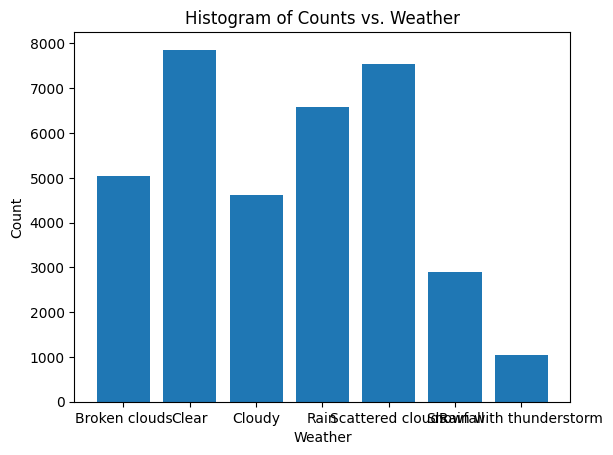

In [19]:
plt.bar(bikes['weather'], bikes['count'])
plt.title('Histogram of Counts vs. Weather')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.show()

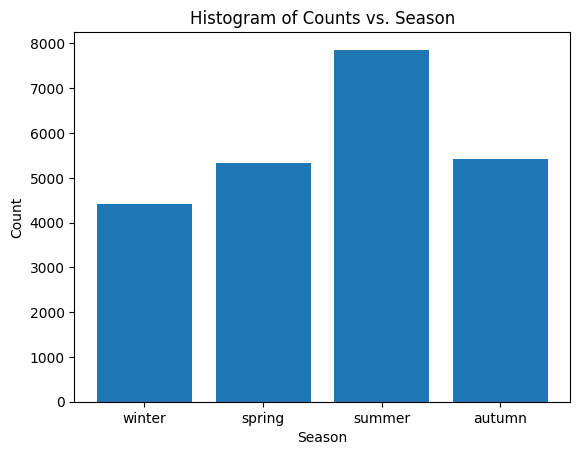

In [23]:
plt.bar(bikes['season'], bikes['count'])
plt.title('Histogram of Counts vs. Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()